# Obsessed with Boba? Analyzing Bubble Tea Shops in NYC Using the Yelp Fusion API
Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from PIL import Image

%matplotlib inline
sns.set(color_codes=True)

In [2]:
# read in data and preview first five rows
df = pd.read_csv('boba-nyc.csv')

df.head()

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,price,location,phone,display_phone,distance,latitude,longitude,geometry
0,7-bx74TooPuZKZDNW4WFcQ,chun-yang-tea-new-york,Chun Yang Tea,https://s3-media1.fl.yelpcdn.com/bphoto/JrGwrZ...,False,https://www.yelp.com/biz/chun-yang-tea-new-yor...,91,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",4.5,"{'latitude': 40.71617, 'longitude': -73.9971}","['delivery', 'pickup']",$$,"{'address1': '26B Elizabeth St', 'address2': '...",1.212420e+10,(212) 420-0123,1212.877370,40.716170,-73.997100,POINT (-73.9971 40.71617)
1,bVJQEeRNi34-3XN_F1AZEg,xing-fu-tang-new-york,Xing Fu Tang,https://s3-media2.fl.yelpcdn.com/bphoto/cyFHFE...,False,https://www.yelp.com/biz/xing-fu-tang-new-york...,91,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",4.5,"{'latitude': 40.7288, 'longitude': -73.98775}","['delivery', 'pickup']",NaN,"{'address1': '133 2nd Ave', 'address2': '', 'a...",NaN,NaN,2656.450427,40.728800,-73.987750,POINT (-73.98775000000001 40.7288)
2,Q3fmTHT7zilDWtfzLK9lMA,truedan-new-york-3,Truedan,https://s3-media2.fl.yelpcdn.com/bphoto/BmUZXO...,False,https://www.yelp.com/biz/truedan-new-york-3?ad...,99,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",4.5,"{'latitude': 40.7191742, 'longitude': -73.9962...","['delivery', 'pickup']",$$,"{'address1': '208 Grand St', 'address2': None,...",1.646559e+10,(646) 559-2886,1535.241614,40.719174,-73.996220,POINT (-73.9962197 40.7191742)
3,DjKAV1M7HWGGyzsfqUrcFw,debutea-new-york,Debutea,https://s3-media2.fl.yelpcdn.com/bphoto/Jwr2Ta...,False,https://www.yelp.com/biz/debutea-new-york?adju...,260,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}...",4.0,"{'latitude': 40.729188, 'longitude': -73.9993244}","['delivery', 'pickup']",$$,"{'address1': '217 Thompson St', 'address2': No...",1.646767e+10,(646) 767-0147,2673.947019,40.729188,-73.999324,POINT (-73.99932440000001 40.729188)
4,wusuW7VDDWEGKfOBbm2k_g,xing-fu-tang-flushing,Xing Fu Tang,https://s3-media1.fl.yelpcdn.com/bphoto/VXbn9_...,False,https://www.yelp.com/biz/xing-fu-tang-flushing...,372,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}...",4.0,"{'latitude': 40.75816, 'longitude': -73.82982}","['delivery', 'pickup']",$,"{'address1': '40-52 Main St', 'address2': None...",1.347369e+10,(347) 368-6886,15042.453771,40.758160,-73.829820,POINT (-73.82982 40.75816)


In [3]:
# preview last five rows
df.tail()

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,price,location,phone,display_phone,distance,latitude,longitude,geometry
410,QBebLBqhiuDlWasPgp6s4Q,tbaar-flushing-5,TBaar,https://s3-media1.fl.yelpcdn.com/bphoto/bgao-b...,False,https://www.yelp.com/biz/tbaar-flushing-5?adju...,2,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",3.5,"{'latitude': 40.759357, 'longitude': -73.830396}","['delivery', 'pickup']",NaN,"{'address1': '135-52 Roosevelt Ave', 'address2...",NaN,NaN,15054.917573,40.759357,-73.830396,POINT (-73.83039599999999 40.759357)
411,7apqk24GsFC9dptoD5dDZg,uncleman-cafe-new-york,Uncleman Cafe,NaN,False,https://www.yelp.com/biz/uncleman-cafe-new-yor...,1,"[{'alias': 'desserts', 'title': 'Desserts'}, {...",1.0,"{'latitude': 40.71781, 'longitude': -73.99795}",[],NaN,"{'address1': '122 Mulberry St', 'address2': No...",1.212967e+10,(212) 966-6206,1414.238245,40.717810,-73.997950,POINT (-73.99795 40.71781)
412,Vz6hbICqQfyMWq9wzAKakw,tbaar-flushing-4,TBaar,https://s3-media1.fl.yelpcdn.com/bphoto/phUYWa...,False,https://www.yelp.com/biz/tbaar-flushing-4?adju...,6,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}...",4.0,"{'latitude': 40.7613116, 'longitude': -73.8308...",[],NaN,"{'address1': '37-11 Main St', 'address2': '', ...",NaN,NaN,15147.410738,40.761312,-73.830812,POINT (-73.8308122 40.7613116)
413,YBgAPbviWYtVP2gAUhc7_A,t-baar-flushing,TBaar,https://s3-media4.fl.yelpcdn.com/bphoto/8pk-_Q...,False,https://www.yelp.com/biz/t-baar-flushing?adjus...,8,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",3.5,"{'latitude': 40.7587509, 'longitude': -73.830162}",[],$,"{'address1': '135-36 40th Rd', 'address2': '',...",NaN,NaN,15045.970192,40.758751,-73.830162,POINT (-73.830162 40.7587509)
414,f5UVQXvDpOrrIZdCjsw47w,maxins-cafe-flushing,Maxin's Cafe,https://s3-media1.fl.yelpcdn.com/bphoto/S3vWvD...,False,https://www.yelp.com/biz/maxins-cafe-flushing?...,15,"[{'alias': 'bakeries', 'title': 'Bakeries'}, {...",3.5,"{'latitude': 40.7585, 'longitude': -73.83064}",[],$,"{'address1': '135-24 40th Rd', 'address2': '',...",1.718887e+10,(718) 886-9200,14997.842205,40.758500,-73.830640,POINT (-73.83064 40.7585)


In [4]:
rows, columns = df.shape
print('number of rows: {}\nnumber of columns: {}'.format(rows, columns))

number of rows: 415
number of columns: 19


In [5]:
# review concise summary of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 415 entries, 0 to 414
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             415 non-null    object 
 1   alias          415 non-null    object 
 2   name           415 non-null    object 
 3   image_url      410 non-null    object 
 4   is_closed      415 non-null    bool   
 5   url            415 non-null    object 
 6   review_count   415 non-null    int64  
 7   categories     415 non-null    object 
 8   rating         415 non-null    float64
 9   coordinates    415 non-null    object 
 10  transactions   415 non-null    object 
 11  price          259 non-null    object 
 12  location       415 non-null    object 
 13  phone          363 non-null    float64
 14  display_phone  363 non-null    object 
 15  distance       415 non-null    float64
 16  latitude       415 non-null    float64
 17  longitude      415 non-null    float64
 18  geometry  

In [6]:
# identifiying number of nulls and percentage of total per column
ser1 = df.isnull().sum().sort_values(ascending=False)
ser2 = round((df.isnull().sum().sort_values(ascending=False) / len(df)) * 100, 2)

pd.concat([ser1.rename('null_count'), ser2.rename('null_perc')], axis=1)

,null_count,null_perc
price,156,37.59
display_phone,52,12.53
phone,52,12.53
image_url,5,1.20
id,0,0.00
transactions,0,0.00
longitude,0,0.00
latitude,0,0.00
distance,0,0.00
location,0,0.00


In [7]:
# descriptive statistics of numeric columns
df.describe()

,review_count,rating,phone,distance,latitude,longitude
count,415.000000,415.000000,3.630000e+02,415.000000,415.000000,415.000000
mean,90.315663,3.986747,1.614830e+10,8978.393212,40.716305,-73.942026
std,117.249122,0.608271,2.378241e+09,5677.349079,0.058249,0.084029
min,1.000000,1.000000,1.201432e+10,953.875131,40.537609,-74.166080
25%,16.500000,3.500000,1.347732e+10,3965.311336,40.689607,-73.994880
50%,49.000000,4.000000,1.718293e+10,8242.510608,40.731610,-73.974950
75%,110.000000,4.500000,1.718886e+10,12977.701801,40.757657,-73.880423
max,740.000000,5.000000,1.934235e+10,25132.157979,40.886959,-73.702410


In [8]:
# descriptive statistics of string/object columns
df.describe(include=['O']).T

,count,unique,top,freq
id,415,415,4wz4FUZiYeCmqzdzQyAo1A,1
alias,415,415,gong-cha-bronx-bronx,1
name,415,260,Kung Fu Tea,26
image_url,410,410,https://s3-media3.fl.yelpcdn.com/bphoto/ruJEgf...,1
url,415,415,https://www.yelp.com/biz/mango-mango-long-isla...,1
categories,415,178,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",115
coordinates,415,410,"{'latitude': 40.71697, 'longitude': -73.99471}",2
transactions,415,5,"['delivery', 'pickup']",157
price,259,3,$,167
location,415,412,"{'address1': '90-15 Queens Blvd', 'address2': ...",2


In [9]:
# confirm that unique id is actually unique
print('id is unique: {}'.format(df['id'].is_unique))

id is unique: True


In [10]:
df.head()

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,price,location,phone,display_phone,distance,latitude,longitude,geometry
0,7-bx74TooPuZKZDNW4WFcQ,chun-yang-tea-new-york,Chun Yang Tea,https://s3-media1.fl.yelpcdn.com/bphoto/JrGwrZ...,False,https://www.yelp.com/biz/chun-yang-tea-new-yor...,91,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",4.5,"{'latitude': 40.71617, 'longitude': -73.9971}","['delivery', 'pickup']",$$,"{'address1': '26B Elizabeth St', 'address2': '...",1.212420e+10,(212) 420-0123,1212.877370,40.716170,-73.997100,POINT (-73.9971 40.71617)
1,bVJQEeRNi34-3XN_F1AZEg,xing-fu-tang-new-york,Xing Fu Tang,https://s3-media2.fl.yelpcdn.com/bphoto/cyFHFE...,False,https://www.yelp.com/biz/xing-fu-tang-new-york...,91,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",4.5,"{'latitude': 40.7288, 'longitude': -73.98775}","['delivery', 'pickup']",NaN,"{'address1': '133 2nd Ave', 'address2': '', 'a...",NaN,NaN,2656.450427,40.728800,-73.987750,POINT (-73.98775000000001 40.7288)
2,Q3fmTHT7zilDWtfzLK9lMA,truedan-new-york-3,Truedan,https://s3-media2.fl.yelpcdn.com/bphoto/BmUZXO...,False,https://www.yelp.com/biz/truedan-new-york-3?ad...,99,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",4.5,"{'latitude': 40.7191742, 'longitude': -73.9962...","['delivery', 'pickup']",$$,"{'address1': '208 Grand St', 'address2': None,...",1.646559e+10,(646) 559-2886,1535.241614,40.719174,-73.996220,POINT (-73.9962197 40.7191742)
3,DjKAV1M7HWGGyzsfqUrcFw,debutea-new-york,Debutea,https://s3-media2.fl.yelpcdn.com/bphoto/Jwr2Ta...,False,https://www.yelp.com/biz/debutea-new-york?adju...,260,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}...",4.0,"{'latitude': 40.729188, 'longitude': -73.9993244}","['delivery', 'pickup']",$$,"{'address1': '217 Thompson St', 'address2': No...",1.646767e+10,(646) 767-0147,2673.947019,40.729188,-73.999324,POINT (-73.99932440000001 40.729188)
4,wusuW7VDDWEGKfOBbm2k_g,xing-fu-tang-flushing,Xing Fu Tang,https://s3-media1.fl.yelpcdn.com/bphoto/VXbn9_...,False,https://www.yelp.com/biz/xing-fu-tang-flushing...,372,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}...",4.0,"{'latitude': 40.75816, 'longitude': -73.82982}","['delivery', 'pickup']",$,"{'address1': '40-52 Main St', 'address2': None...",1.347369e+10,(347) 368-6886,15042.453771,40.758160,-73.829820,POINT (-73.82982 40.75816)


In [11]:
# identify number of unique bubble tea shop entries
names_counts = df['name'].value_counts().reset_index()
names_counts = names_counts.rename(columns={'index':'name', 'name':'counts'})

print('number of unique bubble tea shops: {}'.format(len(names_counts)))
names_counts

number of unique bubble tea shops: 260


,name,counts
0,Kung Fu Tea,26
1,Vivi Bubble Tea,25
2,Gong Cha,24
3,CoCo Fresh Tea & Juice,10
4,Möge Tee,9
...,...,...
255,Squarrel Cafe,1
256,OJBK Tea Shop,1
257,Shan Xi Snack,1
258,Sun&Moon,1


In [12]:
df['name'].value_counts().reset_index(drop=False)

,index,name
0,Kung Fu Tea,26
1,Vivi Bubble Tea,25
2,Gong Cha,24
3,CoCo Fresh Tea & Juice,10
4,Möge Tee,9
...,...,...
255,Squarrel Cafe,1
256,OJBK Tea Shop,1
257,Shan Xi Snack,1
258,Sun&Moon,1


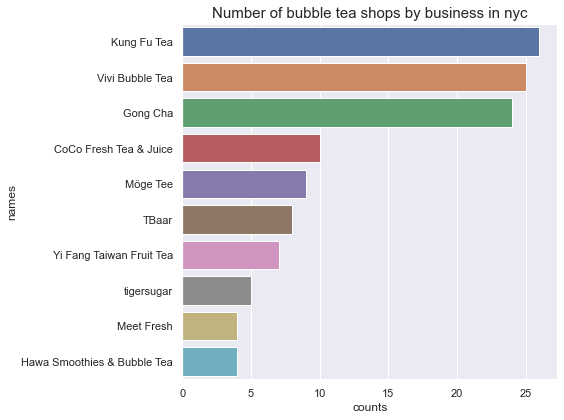

In [13]:
names_counts = df['name'].value_counts().reset_index(drop=False)
names_counts = names_counts.rename(columns={'index':'names', 'name':'counts'})

fig, ax = plt.subplots(figsize=(8, 6))

sns.barplot(x='counts',
            y="names", 
            data=names_counts.head(10), 
            ax=ax)

plt.title('Number of bubble tea shops by business in nyc', fontsize=15)
plt.tight_layout()

In [14]:
review_count_df = df.groupby(by='name')['review_count'].mean().sort_values(ascending=False)
review_count_df = round(review_count_df, 2)
review_count_df = review_count_df.reset_index()

review_count_df.head()

,name,review_count
0,Ten Ren's Tea Time,656.0
1,Hanco's,519.0
2,Ajisen Ramen,438.0
3,Teado Tea Shop,428.0
4,520 Dessert,358.0


/Users/geribauer/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 27792 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/geribauer/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 30333 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/geribauer/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 27792 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/geribauer/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 30333 missing from current font.
  font.set_text(s, 0, flags=flags)


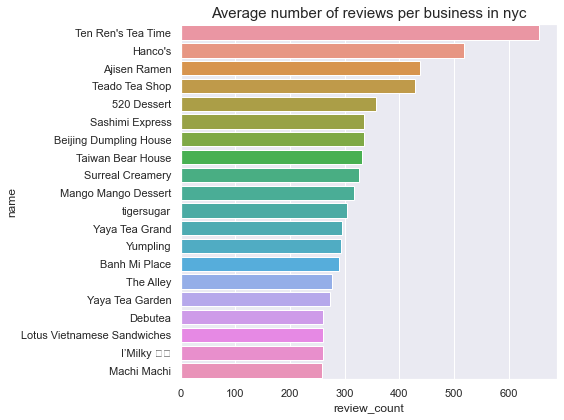

In [15]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.barplot(x="review_count", 
            y="name", 
            data=review_count_df.head(20), 
            ax=ax)

plt.title('Average number of reviews per business in nyc', fontsize=15)
plt.tight_layout()

In [16]:
most_reviewed = df.sort_values(by='review_count', ascending=False).head(20)

most_reviewed.head()

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,price,location,phone,display_phone,distance,latitude,longitude,geometry
167,bn0zZ9nT_j1INOwfpxWmEw,tiger-sugar-flushing,tigersugar,https://s3-media2.fl.yelpcdn.com/bphoto/hai87B...,False,https://www.yelp.com/biz/tiger-sugar-flushing?...,740,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}...",4.0,"{'latitude': 40.75922023369396, 'longitude': -...","['delivery', 'pickup']",$$,"{'address1': '40-10 Main St', 'address2': 'Ste...",1.347732e+10,(347) 732-4001,15055.920826,40.759220,-73.830305,POINT (-73.83030496537685 40.75922023369396)
82,NqnYnZtajJ4Y-Lmxa26VdA,hancos-brooklyn,Hanco's,https://s3-media3.fl.yelpcdn.com/bphoto/_vQWWX...,False,https://www.yelp.com/biz/hancos-brooklyn?adjus...,704,"[{'alias': 'vietnamese', 'title': 'Vietnamese'...",4.0,"{'latitude': 40.6870318621828, 'longitude': -7...","['pickup', 'delivery']",$,"{'address1': '134 Smith St', 'address2': '', '...",1.718859e+10,(718) 858-6818,2073.182530,40.687032,-73.990429,POINT (-73.9904292380982 40.6870318621828)
44,WxNlqGSsj_2TCodkx9Sa4A,vivi-bubble-tea-new-york-6,Vivi Bubble Tea,https://s3-media2.fl.yelpcdn.com/bphoto/Fw3SYB...,False,https://www.yelp.com/biz/vivi-bubble-tea-new-y...,658,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",4.0,"{'latitude': 40.715099, 'longitude': -73.997535}","['delivery', 'pickup']",$,"{'address1': '49 Bayard St', 'address2': '', '...",1.212567e+10,(212) 566-6833,1114.073275,40.715099,-73.997535,POINT (-73.997535 40.715099)
47,SqVHETmH6bf3rPKmdftvvw,ten-rens-tea-time-new-york-2,Ten Ren's Tea Time,https://s3-media1.fl.yelpcdn.com/bphoto/UChdn5...,False,https://www.yelp.com/biz/ten-rens-tea-time-new...,656,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",4.0,"{'latitude': 40.7163819, 'longitude': -73.9982...",['delivery'],$$,"{'address1': '73 Mott St', 'address2': '', 'ad...",1.212733e+10,(212) 732-7178,1261.450313,40.716382,-73.998268,POINT (-73.99826830000001 40.7163819)
287,ZLo3HRSSvN--Mw4eCBLxCg,mango-mango-dessert-flushing-3,Mango Mango Dessert,https://s3-media3.fl.yelpcdn.com/bphoto/X7bnQ9...,False,https://www.yelp.com/biz/mango-mango-dessert-f...,622,"[{'alias': 'desserts', 'title': 'Desserts'}, {...",4.0,"{'latitude': 40.7603809317017, 'longitude': -7...","['pickup', 'delivery']",$,"{'address1': '136-28 39th Ave', 'address2': ''...",1.917563e+10,(917) 563-1847,15199.500511,40.760381,-73.829452,POINT (-73.8294516357502 40.7603809317017)


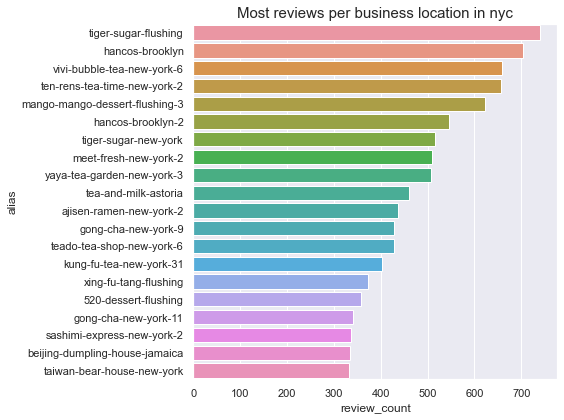

In [17]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.barplot(x="review_count", 
            y="alias", 
            data=most_reviewed, 
            ax=ax)

plt.title('Most reviews per business location in nyc', fontsize=15)
plt.tight_layout()

In [18]:
df['rating'].describe()

count    415.000000
mean       3.986747
std        0.608271
min        1.000000
25%        3.500000
50%        4.000000
75%        4.500000
max        5.000000
Name: rating, dtype: float64

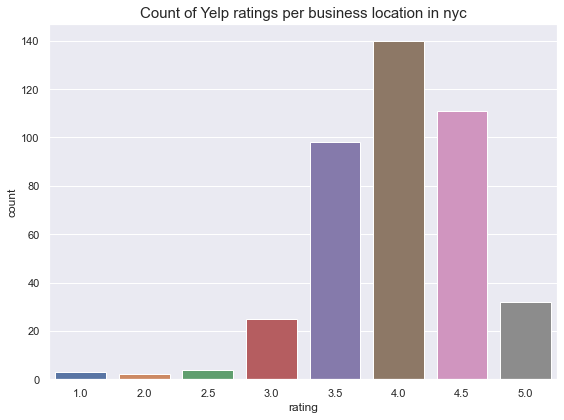

In [20]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.countplot(data=df, 
             x="rating")

plt.title('Count of Yelp ratings per business location in nyc', fontsize=15)
plt.tight_layout()

In [21]:
price_df = df['price'].dropna().value_counts()
price_df = price_df.reset_index()
price_df.columns = ['price', 'counts']

price_df

,price,counts
0,$,167
1,$$,91
2,$$$$,1


In [22]:
price_df['price'] = price_df['price'].str.count('\\$')

price_df

,price,counts
0,1,167
1,2,91
2,4,1


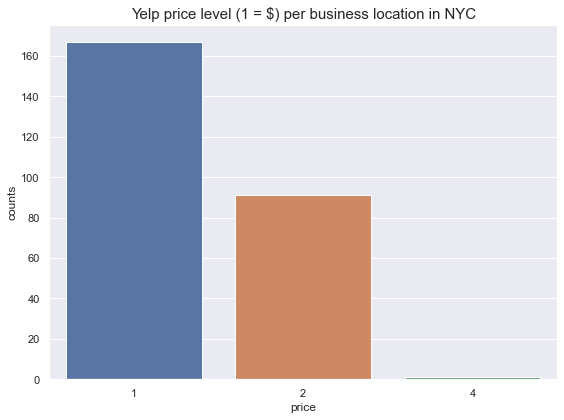

In [23]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.barplot(y="counts", 
            x="price", 
            data=price_df, 
            ax=ax)

plt.title('Yelp price level (1 = $) per business location in NYC', fontsize=15)
plt.tight_layout()

In [24]:
url = 'https://data.cityofnewyork.us/api/geospatial/cpf4-rkhq?method=export&format=Shapefile'
neighborhoods = gpd.read_file(url)

neighborhoods.head()

,boro_code,boro_name,county_fip,ntacode,ntaname,shape_area,shape_leng,geometry
0,4.0,Queens,081,QN51,Murray Hill,5.248828e+07,33266.904856,"POLYGON ((-73.80379 40.77561, -73.80099 40.775..."
1,4.0,Queens,081,QN27,East Elmhurst,1.972685e+07,19816.711894,"POLYGON ((-73.86110 40.76366, -73.85993 40.762..."
2,4.0,Queens,081,QN41,Fresh Meadows-Utopia,2.777485e+07,22106.431272,"POLYGON ((-73.77758 40.73019, -73.77849 40.729..."
3,1.0,Manhattan,061,MN17,Midtown-Midtown South,3.019153e+07,27032.700375,"POLYGON ((-73.97301 40.76428, -73.97141 40.763..."
4,2.0,Bronx,005,BX09,Soundview-Castle Hill-Clason Point-Harding Park,5.198380e+07,67340.977626,"MULTIPOLYGON (((-73.88064 40.81852, -73.88098 ..."


In [25]:
neighborhoods.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [26]:
neighborhoods = neighborhoods.to_crs('EPSG:4326')

neighborhoods.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [27]:
df.head()

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,price,location,phone,display_phone,distance,latitude,longitude,geometry
0,7-bx74TooPuZKZDNW4WFcQ,chun-yang-tea-new-york,Chun Yang Tea,https://s3-media1.fl.yelpcdn.com/bphoto/JrGwrZ...,False,https://www.yelp.com/biz/chun-yang-tea-new-yor...,91,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",4.5,"{'latitude': 40.71617, 'longitude': -73.9971}","['delivery', 'pickup']",$$,"{'address1': '26B Elizabeth St', 'address2': '...",1.212420e+10,(212) 420-0123,1212.877370,40.716170,-73.997100,POINT (-73.9971 40.71617)
1,bVJQEeRNi34-3XN_F1AZEg,xing-fu-tang-new-york,Xing Fu Tang,https://s3-media2.fl.yelpcdn.com/bphoto/cyFHFE...,False,https://www.yelp.com/biz/xing-fu-tang-new-york...,91,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",4.5,"{'latitude': 40.7288, 'longitude': -73.98775}","['delivery', 'pickup']",NaN,"{'address1': '133 2nd Ave', 'address2': '', 'a...",NaN,NaN,2656.450427,40.728800,-73.987750,POINT (-73.98775000000001 40.7288)
2,Q3fmTHT7zilDWtfzLK9lMA,truedan-new-york-3,Truedan,https://s3-media2.fl.yelpcdn.com/bphoto/BmUZXO...,False,https://www.yelp.com/biz/truedan-new-york-3?ad...,99,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",4.5,"{'latitude': 40.7191742, 'longitude': -73.9962...","['delivery', 'pickup']",$$,"{'address1': '208 Grand St', 'address2': None,...",1.646559e+10,(646) 559-2886,1535.241614,40.719174,-73.996220,POINT (-73.9962197 40.7191742)
3,DjKAV1M7HWGGyzsfqUrcFw,debutea-new-york,Debutea,https://s3-media2.fl.yelpcdn.com/bphoto/Jwr2Ta...,False,https://www.yelp.com/biz/debutea-new-york?adju...,260,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}...",4.0,"{'latitude': 40.729188, 'longitude': -73.9993244}","['delivery', 'pickup']",$$,"{'address1': '217 Thompson St', 'address2': No...",1.646767e+10,(646) 767-0147,2673.947019,40.729188,-73.999324,POINT (-73.99932440000001 40.729188)
4,wusuW7VDDWEGKfOBbm2k_g,xing-fu-tang-flushing,Xing Fu Tang,https://s3-media1.fl.yelpcdn.com/bphoto/VXbn9_...,False,https://www.yelp.com/biz/xing-fu-tang-flushing...,372,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}...",4.0,"{'latitude': 40.75816, 'longitude': -73.82982}","['delivery', 'pickup']",$,"{'address1': '40-52 Main St', 'address2': None...",1.347369e+10,(347) 368-6886,15042.453771,40.758160,-73.829820,POINT (-73.82982 40.75816)


In [28]:
gdf = gpd.GeoDataFrame(df, crs=4326,
      geometry=gpd.points_from_xy(df.longitude, df.latitude))

gdf.head()

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,price,location,phone,display_phone,distance,latitude,longitude,geometry
0,7-bx74TooPuZKZDNW4WFcQ,chun-yang-tea-new-york,Chun Yang Tea,https://s3-media1.fl.yelpcdn.com/bphoto/JrGwrZ...,False,https://www.yelp.com/biz/chun-yang-tea-new-yor...,91,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",4.5,"{'latitude': 40.71617, 'longitude': -73.9971}","['delivery', 'pickup']",$$,"{'address1': '26B Elizabeth St', 'address2': '...",1.212420e+10,(212) 420-0123,1212.877370,40.716170,-73.997100,POINT (-73.99710 40.71617)
1,bVJQEeRNi34-3XN_F1AZEg,xing-fu-tang-new-york,Xing Fu Tang,https://s3-media2.fl.yelpcdn.com/bphoto/cyFHFE...,False,https://www.yelp.com/biz/xing-fu-tang-new-york...,91,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",4.5,"{'latitude': 40.7288, 'longitude': -73.98775}","['delivery', 'pickup']",NaN,"{'address1': '133 2nd Ave', 'address2': '', 'a...",NaN,NaN,2656.450427,40.728800,-73.987750,POINT (-73.98775 40.72880)
2,Q3fmTHT7zilDWtfzLK9lMA,truedan-new-york-3,Truedan,https://s3-media2.fl.yelpcdn.com/bphoto/BmUZXO...,False,https://www.yelp.com/biz/truedan-new-york-3?ad...,99,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",4.5,"{'latitude': 40.7191742, 'longitude': -73.9962...","['delivery', 'pickup']",$$,"{'address1': '208 Grand St', 'address2': None,...",1.646559e+10,(646) 559-2886,1535.241614,40.719174,-73.996220,POINT (-73.99622 40.71917)
3,DjKAV1M7HWGGyzsfqUrcFw,debutea-new-york,Debutea,https://s3-media2.fl.yelpcdn.com/bphoto/Jwr2Ta...,False,https://www.yelp.com/biz/debutea-new-york?adju...,260,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}...",4.0,"{'latitude': 40.729188, 'longitude': -73.9993244}","['delivery', 'pickup']",$$,"{'address1': '217 Thompson St', 'address2': No...",1.646767e+10,(646) 767-0147,2673.947019,40.729188,-73.999324,POINT (-73.99932 40.72919)
4,wusuW7VDDWEGKfOBbm2k_g,xing-fu-tang-flushing,Xing Fu Tang,https://s3-media1.fl.yelpcdn.com/bphoto/VXbn9_...,False,https://www.yelp.com/biz/xing-fu-tang-flushing...,372,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}...",4.0,"{'latitude': 40.75816, 'longitude': -73.82982}","['delivery', 'pickup']",$,"{'address1': '40-52 Main St', 'address2': None...",1.347369e+10,(347) 368-6886,15042.453771,40.758160,-73.829820,POINT (-73.82982 40.75816)


In [29]:
join_df = gpd.sjoin(gdf, 
                    neighborhoods, 
                    op='intersects') 

join_df.head()

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,...,longitude,geometry,index_right,boro_code,boro_name,county_fip,ntacode,ntaname,shape_area,shape_leng
0,7-bx74TooPuZKZDNW4WFcQ,chun-yang-tea-new-york,Chun Yang Tea,https://s3-media1.fl.yelpcdn.com/bphoto/JrGwrZ...,False,https://www.yelp.com/biz/chun-yang-tea-new-yor...,91,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",4.5,"{'latitude': 40.71617, 'longitude': -73.9971}",...,-73.997100,POINT (-73.99710 40.71617),88,1.0,Manhattan,061,MN27,Chinatown,1.450188e+07,20786.254332
5,zyiauY6dhZa8WVmLQ83M2A,miss-du-s-tea-shop-new-york,Miss Du’s Tea Shop,https://s3-media2.fl.yelpcdn.com/bphoto/u7dMJK...,False,https://www.yelp.com/biz/miss-du-s-tea-shop-ne...,57,"[{'alias': 'coffee', 'title': 'Coffee & Tea'},...",4.5,"{'latitude': 40.71489, 'longitude': -73.99856}",...,-73.998560,POINT (-73.99856 40.71489),88,1.0,Manhattan,061,MN27,Chinatown,1.450188e+07,20786.254332
13,3aypSFXLfkAL4dhHVFobKg,lazy-sundaes-new-york-6,Lazy Sundaes,https://s3-media3.fl.yelpcdn.com/bphoto/kEfCYC...,False,https://www.yelp.com/biz/lazy-sundaes-new-york...,32,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}...",4.5,"{'latitude': 40.720597, 'longitude': -73.984539}",...,-73.984539,POINT (-73.98454 40.72060),88,1.0,Manhattan,061,MN27,Chinatown,1.450188e+07,20786.254332
20,3ZIRnbaanUuYCeTll3Bs-w,wu-qi-my-tea-new-york-2,Wu Qi My Tea,https://s3-media4.fl.yelpcdn.com/bphoto/GoUQtq...,False,https://www.yelp.com/biz/wu-qi-my-tea-new-york...,11,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",4.0,"{'latitude': 40.715181, 'longitude': -73.997787}",...,-73.997787,POINT (-73.99779 40.71518),88,1.0,Manhattan,061,MN27,Chinatown,1.450188e+07,20786.254332
32,AYjVpQ5jYz5gJJqXh_B_CA,teado-tea-shop-new-york-6,Teado Tea Shop,https://s3-media1.fl.yelpcdn.com/bphoto/e21Z-A...,False,https://www.yelp.com/biz/teado-tea-shop-new-yo...,428,"[{'alias': 'coffee', 'title': 'Coffee & Tea'},...",4.5,"{'latitude': 40.7172143, 'longitude': -73.9949...",...,-73.994962,POINT (-73.99496 40.71721),88,1.0,Manhattan,061,MN27,Chinatown,1.450188e+07,20786.254332


In [30]:
join_df = join_df.groupby(by=['ntaname', 'shape_area'])['id'].count().sort_values(ascending=False)
join_df = join_df.reset_index()

join_df = join_df.rename(columns={'id':'counts'})
join_df['counts_squaremile'] = join_df['counts'] / 27878400

join_df.head()

,ntaname,shape_area,counts,counts_squaremile
0,Flushing,3.786424e+07,40,1.434803e-06
1,Chinatown,1.450188e+07,28,1.004362e-06
2,Sunset Park East,2.711007e+07,23,8.250115e-07
3,Hunters Point-Sunnyside-West Maspeth,1.024191e+08,19,6.815312e-07
4,Elmhurst,3.267480e+07,17,6.097911e-07


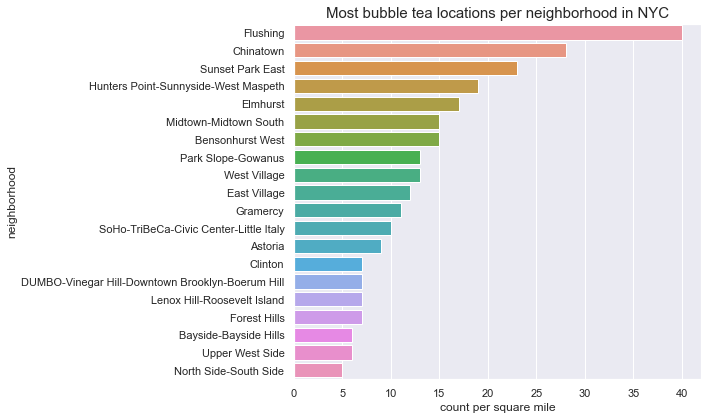

In [31]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.barplot(x="counts", 
            y="ntaname", 
            data=join_df.head(20), 
            ax=ax)

plt.title('Most bubble tea locations per neighborhood in NYC', fontsize=15)
plt.ylabel('neighborhood')
plt.xlabel('count per square mile')

plt.tight_layout()
plt.savefig('busineses-per-neighborhood.png', dpi=200)

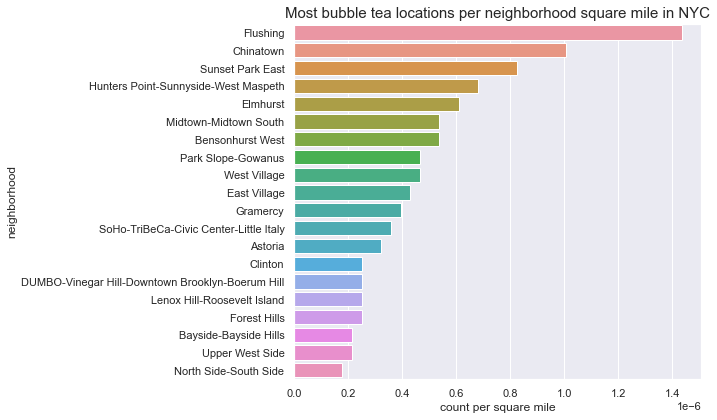

In [32]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.barplot(x="counts_squaremile", 
            y="ntaname", 
            data=join_df.head(20), 
            ax=ax)

plt.title('Most bubble tea locations per neighborhood square mile in NYC', fontsize=15)
plt.ylabel('neighborhood')
plt.xlabel('count per square mile')

plt.tight_layout()
plt.savefig('busineses-per-neighborhood.png', dpi=200)